## Inspection/troubleshooting of LDA model

In [19]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

import matplotlib.pyplot as plt

import my_lda

In [2]:
num_topics = 100
alpha = 0.01
eta = 0.1
model_root = f'lda_{num_topics}_{alpha}_{eta}'

metadata_path = 'results/final_models/metadata_2021.csv.gz'
corpus_directory = 'results/final_models/lda_2021_corpus_clean/'
dictionary_path = 'results/final_models/dictionary.dict'
model_path = f'results/final_models/{model_root}_model'

In [3]:
metadata = pd.read_csv(metadata_path, sep='\t')
dictionary = Dictionary.load(dictionary_path)
doc_path_list = [corpus_directory + file for file in os.listdir(corpus_directory) 
                 if file.endswith('.txt')]
corpus = my_lda.MyCorpus(doc_path_list, dictionary=dictionary)
model = LdaModel.load(model_path)

### View distribution of topics per document

100%|██████████| 53758/53758 [06:46<00:00, 132.31it/s]


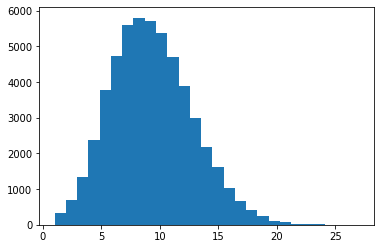

In [9]:
my_lda.topics_per_doc(model, corpus)

### View number of topics per word

100%|██████████| 100000/100000 [00:14<00:00, 6953.40it/s]


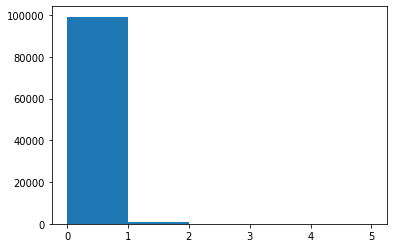

In [21]:
def plot_topics_per_word(model, dictionary):
    topics_per_word = []
    for i in tqdm(range(len(dictionary))):
        topics_per_word.append(len(model.get_term_topics(i)))
    plt.hist(topics_per_word, bins=max(topics_per_word))

plot_topics_per_word(model, dictionary)

### View topic predictions for query

In [23]:
query = 'What endocrine complications are  linked to COVID-19?'

my_lda.print_pred(query, corpus, model)

What endocrine complications are  linked to COVID-19? 

endocrine complications link covid19 

bow: 
complications 1
endocrine 1

Topic predictions: 
[(92, 0.35180938), (15, 0.321474)] 

complications []
endocrine []


### View topic relevance for word

In [43]:
word = 'complications'
model.get_term_topics(dictionary.token2id[word], minimum_probability=num_topics/len(corpus.dictionary))

[(1, 0.0069413385),
 (15, 0.008447186),
 (40, 0.0018138113),
 (67, 0.0022749496),
 (68, 0.0017632607),
 (76, 0.0020880084)]

In [41]:
my_lda.topic_words(92, model, corpus)

['liver',
 'inflammatory',
 'injury',
 'elevate',
 'therapy',
 'complications',
 'failure',
 'pulmonary',
 'crp',
 'ddimer',
 'thrombosis',
 'admission',
 'platelet',
 'coagulation',
 'serum',
 'tocilizumab',
 'laboratory',
 'systemic',
 'ill',
 'damage',
 'dysfunction',
 'inflammation',
 'stroke',
 'il6',
 'count',
 'oxygen',
 'bleed',
 'vascular',
 'ferritin',
 'venous',
 'anticoagulation',
 'critically',
 'icu',
 'pneumonia',
 'mild',
 'markers',
 'manifestations',
 'thrombotic',
 'organ',
 'ards',
 'autopsy',
 'cytokine',
 'platelets',
 'arterial',
 'hospitalize',
 'heparin',
 'discharge',
 'incidence',
 'dose',
 'history']